# Fashion Recommendation System using CNN (ResNet50) Model









Done by: Aneesa Begum J

RRN: 210171601010

Dept: BTech AI&DS

In [ ]:
# installing swifter and tensorflow latest version
!pip install swifter
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 9.6 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=2ae02c4279a42f80d8b995f3a644f0430b42be884da78229e9044edc17238981
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 

In [ ]:
# importing libraries

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

**Mount google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Specify your folder path
folder_path = '/content/drive/MyDrive/myntradataset'

# List all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    print(file_path)  # Print file path, or perform other operations on files

/content/drive/MyDrive/myntradataset/styles.csv
/content/drive/MyDrive/myntradataset/images
/content/drive/MyDrive/myntradataset/modified_styles.csv


# Dataset Preparation

In [ ]:
import pandas as pd

# Define the path to your dataset folder
DATASET_PATH = '/content/drive/MyDrive/myntradataset/'

# Load the CSV file with the first 5000 rows, skipping bad lines if they exist
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, on_bad_lines='skip')

# Create an 'image' column by appending ".jpg" to the 'id' column values
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)

# Reset the index
df = df.reset_index(drop=True)

# Display the first 10 rows
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


In [ ]:
# Define the path where you want to save the new CSV file in your Google Drive
output_path = '/content/drive/MyDrive/myntradataset/modified_styles.csv'

# Save the dataset to a CSV file
df.to_csv(output_path, index=False)

print(f"Dataset saved to {output_path}")

Dataset saved to /content/drive/MyDrive/myntradataset/modified_styles.csv


# EDA

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,1
year,0
usage,47
productDisplayName,1


In [ ]:
# Data Cleaning
df.dropna(subset=['season', 'usage', 'productDisplayName'], inplace=True)

# Check unique values and value counts in key columns
print("Unique categories in each feature:")
print(df['masterCategory'].value_counts())
print(df['subCategory'].value_counts())
print(df['baseColour'].value_counts())

Unique categories in each feature:
masterCategory
Apparel          2287
Accessories      1331
Footwear         1069
Personal Care     250
Free Items         14
Name: count, dtype: int64
subCategory
Topwear                     1601
Shoes                        848
Bags                         380
Watches                      322
Bottomwear                   306
Innerwear                    226
Jewellery                    145
Fragrance                    128
Sandal                       113
Flip Flops                   108
Wallets                      108
Belts                        100
Eyewear                       98
Socks                         68
Lips                          65
Dress                         52
Loungewear and Nightwear      51
Headwear                      41
Saree                         34
Ties                          26
Makeup                        19
Nails                         18
Apparel Set                   17
Accessories                   15
Free Gifts

In [ ]:
# Basic information about the dataset
print("Data Information:")
print(df.info())

# Checking for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Descriptive statistics of the dataset
print("\nStatistical Summary:")
print(df.describe())


Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 4951 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4951 non-null   int64 
 1   gender              4951 non-null   object
 2   masterCategory      4951 non-null   object
 3   subCategory         4951 non-null   object
 4   articleType         4951 non-null   object
 5   baseColour          4951 non-null   object
 6   season              4951 non-null   object
 7   year                4951 non-null   int64 
 8   usage               4951 non-null   object
 9   productDisplayName  4951 non-null   object
 10  image               4951 non-null   object
dtypes: int64(2), object(9)
memory usage: 464.2+ KB
None

Missing Values in Each Column:
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0

# Visualization Plots

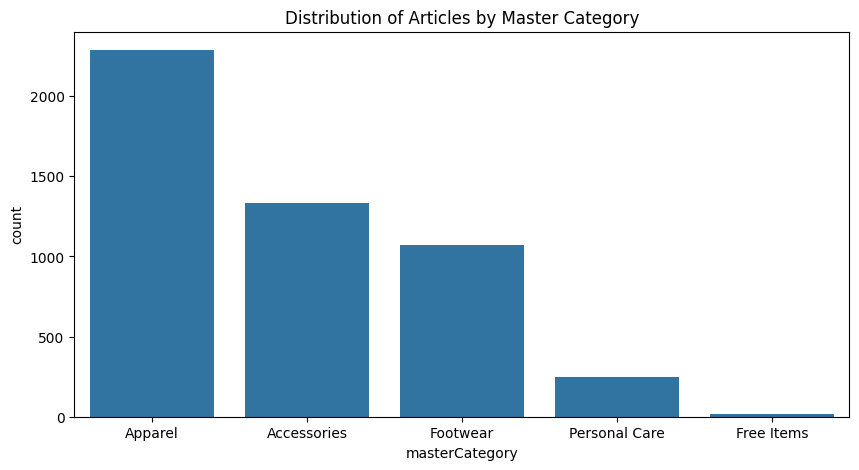

In [ ]:
# Plot distribution of articles by category
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='masterCategory', order=df['masterCategory'].value_counts().index)
plt.title('Distribution of Articles by Master Category')
plt.show()

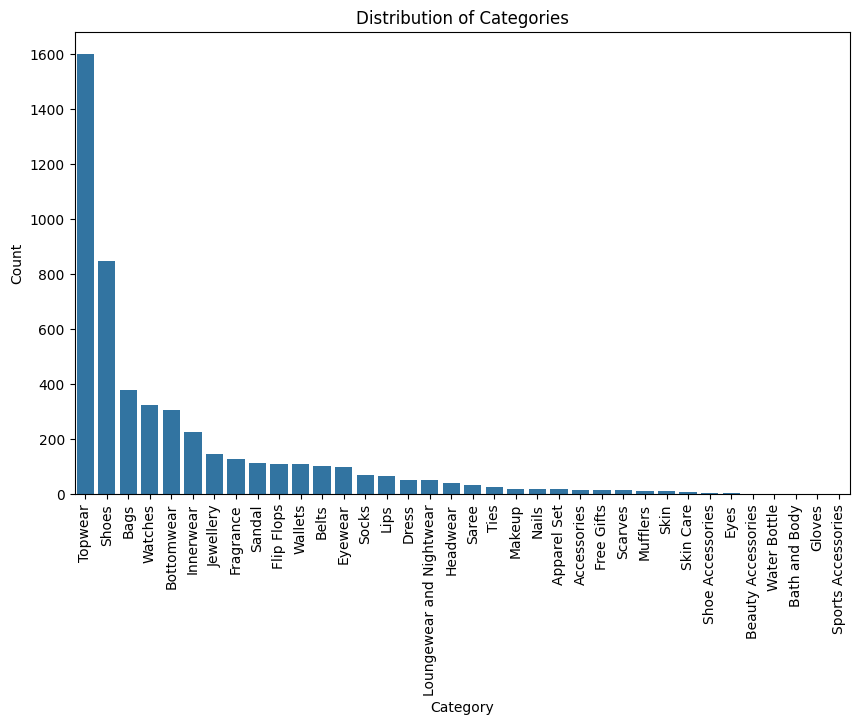

In [ ]:
# Bar plot for category distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='subCategory', order=df['subCategory'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


<Axes: ylabel='articleType'>

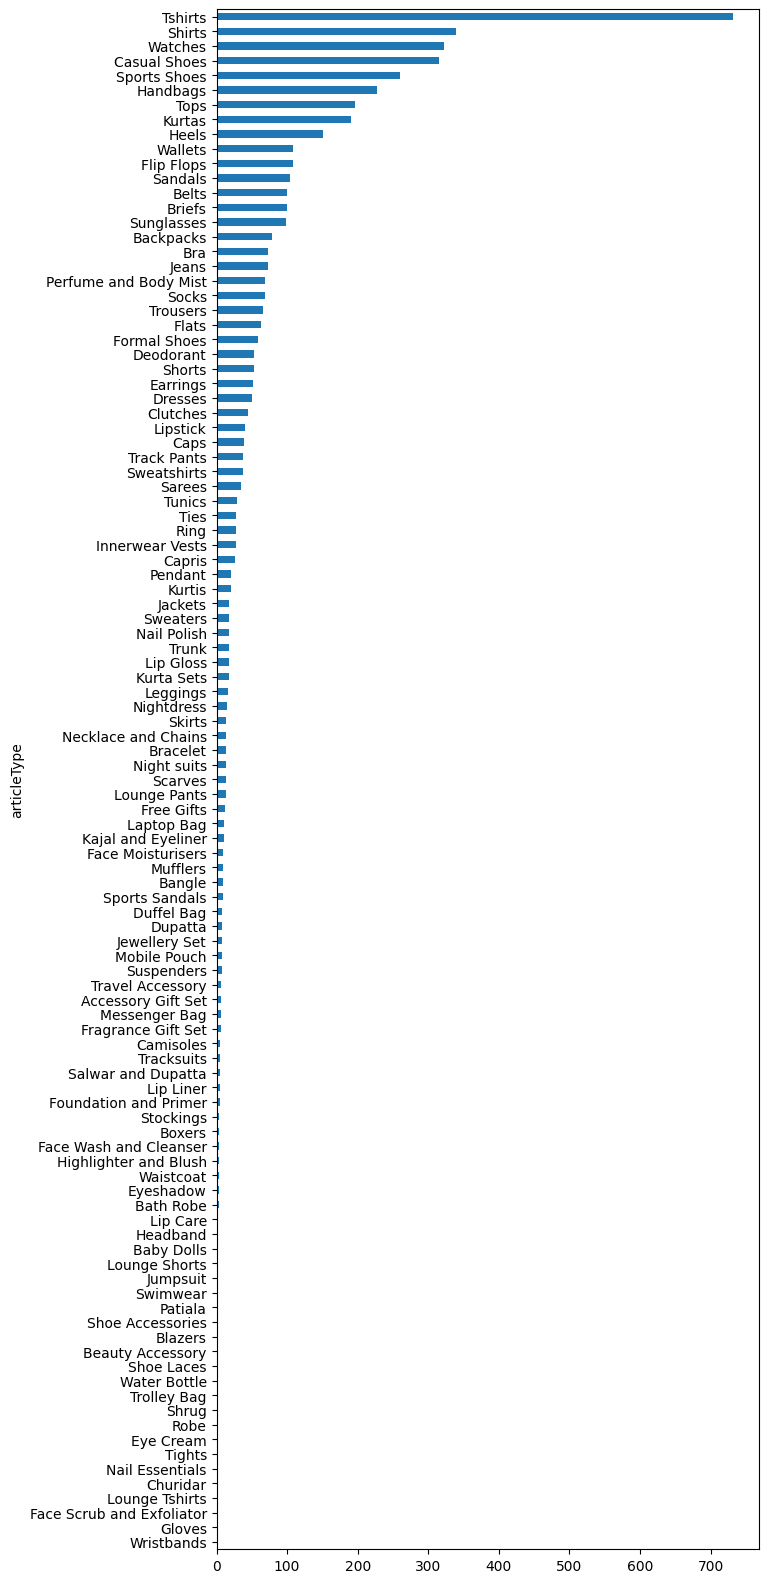

In [ ]:
# Horizontal plot for articleType distribution
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')

In [ ]:
# importing cv2 for image data
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img):
    return cv2.imread(img_path(img))

#  Displaying few images of different products

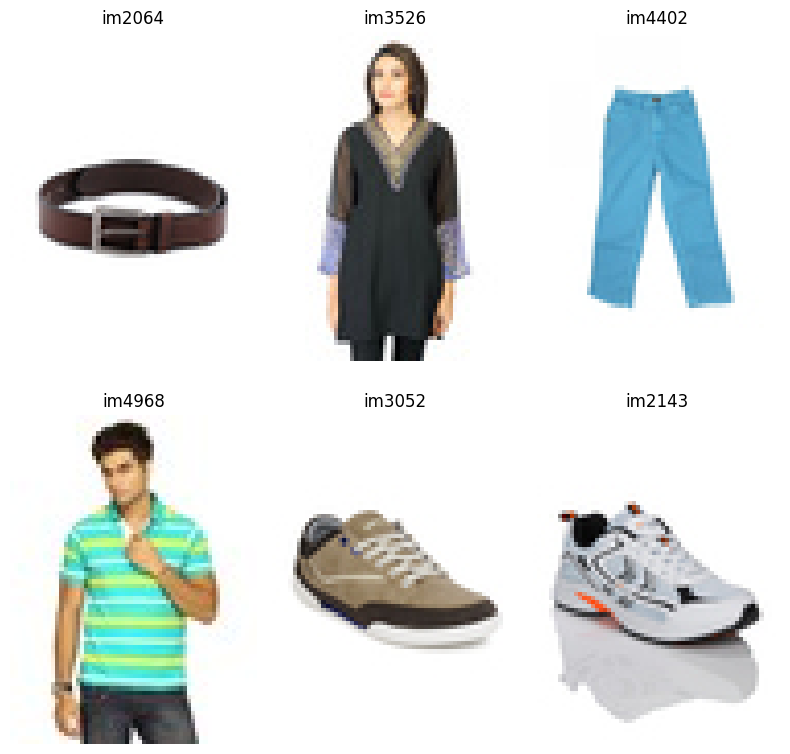

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

#Displaying the first 50 images of products

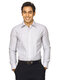

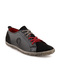

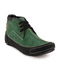

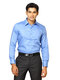

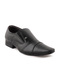

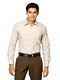

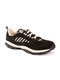

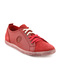

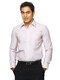

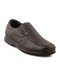

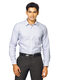

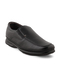

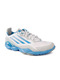

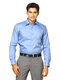

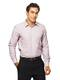

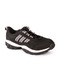

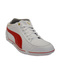

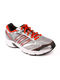

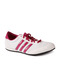

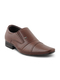

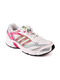

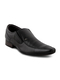

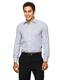

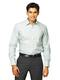

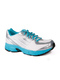

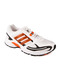

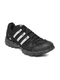

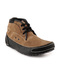

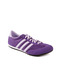

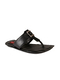

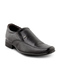

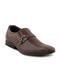

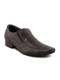

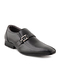

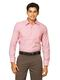

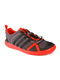

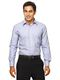

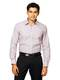

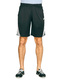

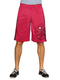

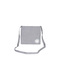

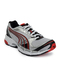

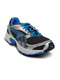

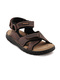

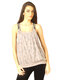

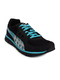

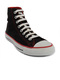

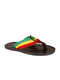

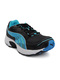

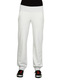

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Define the images folder path
images_folder_path = '/content/drive/MyDrive/myntradataset/images'

# Load and display images with a check for existence and empty files
image_files = os.listdir(images_folder_path)
for image_file in image_files[:50]:  # Display the first 10 images as an example
    image_path = os.path.join(images_folder_path, image_file)

    # Check if the file exists
    if os.path.exists(image_path):
        image = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if image is not None:
            cv2_imshow(image)
        else:
            print(f"Warning: {image_file} is empty or could not be loaded.")
    else:
        print(f"Warning: {image_file} does not exist.")


In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D
tf.__version__

'2.8.0'

# Pre-Trained CNN (ResNet50) Model for Recommendation of similar products

In [ ]:
# Input Shape
img_width, img_height, _ = load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 2, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


#Embeddings

In [ ]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

**Get item Embedding**

In [ ]:
emb = get_embedding(model, df.iloc[1].image)
emb.shape


(2048,)

[1.8793359  1.6008773  0.09203184 ... 3.268896   2.271731   5.433383  ]


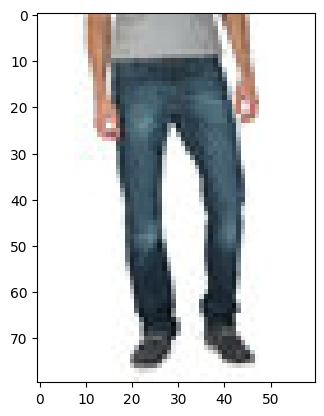

In [ ]:
plt.imshow(cv2.cvtColor(load_image(df.iloc[1].image), cv2.COLOR_BGR2RGB))
print(emb)

**Get item Embedding for all items in the dataset**

In [ ]:
%%time
import swifter

# Parallel apply
map_embeddings = df['image'].swifter.apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

Pandas Apply:   0%|          | 0/4951 [00:00<?, ?it/s]

(4951, 2048)
CPU times: user 10min 43s, sys: 19.1 s, total: 11min 2s
Wall time: 26min 24s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,3.651428,0.000000,0.752223,0.000000,0.000000,4.103798,2.382156,2.472526,0.0,...,0.366395,0.000000,0.000000,6.000694,0.000000,0.000000,6.389913,4.246405,1.067721,1.671672
1,1.879336,1.600877,0.092032,4.433075,0.000000,0.000000,3.030768,8.530592,5.498659,0.0,...,2.808288,0.000000,3.923481,3.183100,0.000000,0.000000,4.244204,3.268896,2.271731,5.433383
2,0.000000,0.311198,0.000000,3.808684,0.437029,7.112498,0.000000,0.000000,0.000000,0.0,...,0.218205,7.861299,1.655931,0.000000,0.000000,0.000000,4.703012,0.000000,2.340580,0.000000
3,0.588016,9.894614,0.000000,6.295310,1.783727,1.913125,0.000000,13.309944,7.805776,0.0,...,22.434374,0.000000,0.000000,0.000000,2.565928,3.330479,0.594361,1.130465,3.084237,7.608927
4,0.000000,1.882975,0.000000,5.122098,0.000000,0.000000,2.950293,6.626863,1.606632,0.0,...,2.504942,0.000000,1.274126,3.484578,0.786348,0.000000,1.597857,2.515498,0.068352,0.000000


**Calculating Cosine Similarity**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[1.        , 0.5789429 , 0.23815572, 0.49101055],
       [0.5789429 , 0.99999905, 0.23951328, 0.72273475],
       [0.23815572, 0.23951328, 0.99999994, 0.22011638],
       [0.49101055, 0.72273475, 0.22011638, 1.        ]], dtype=float32)

In [ ]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get recommendations based on the cosine similarity score of features
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]

    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Index([259, 4305, 0, 2779, 2701], dtype='int64'),
 [0.90718937, 0.8946353, 0.8918901, 0.88897943, 0.880775])

#Recommendations based on cosine similarity

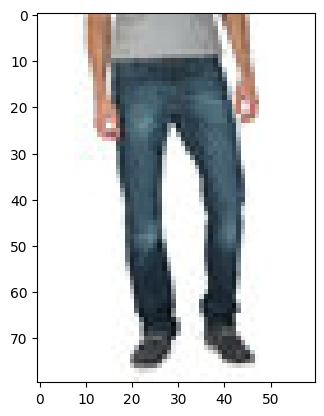

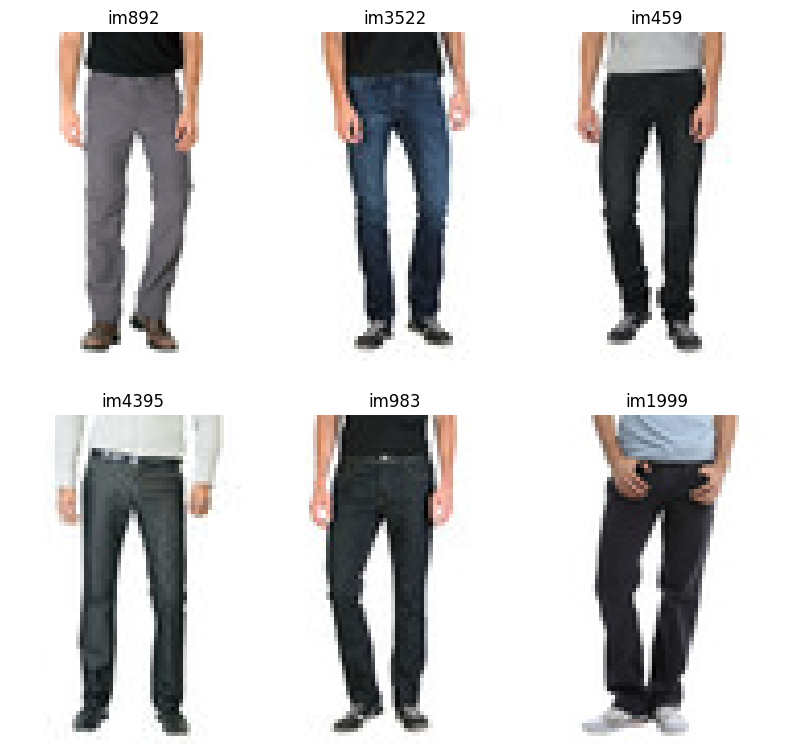

In [ ]:
# Idx Item to Recommender
idx_ref = 1

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

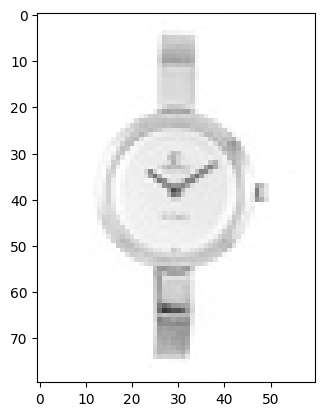

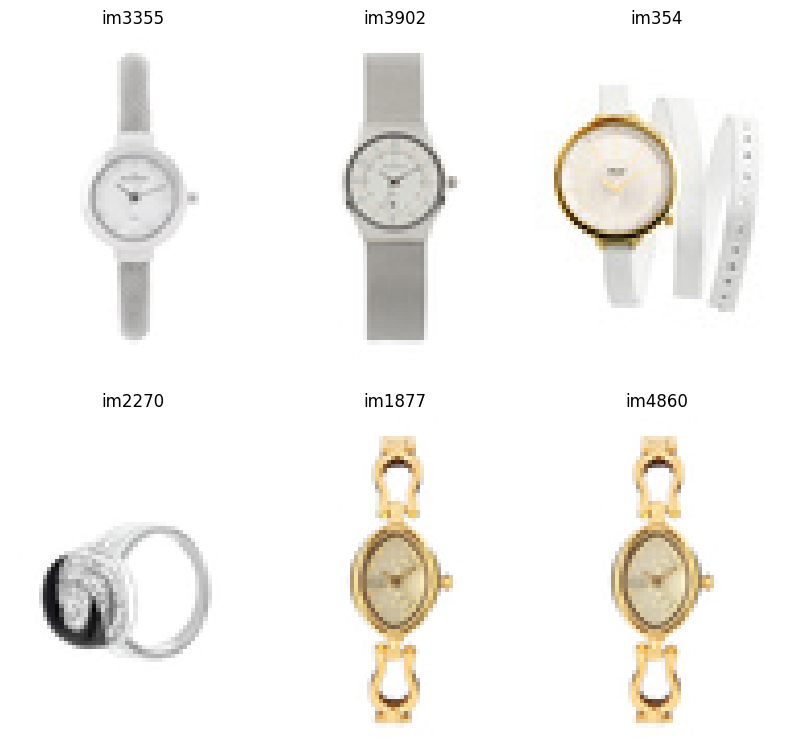

In [ ]:
# Idx Item to Recommender
idx_ref = 2

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

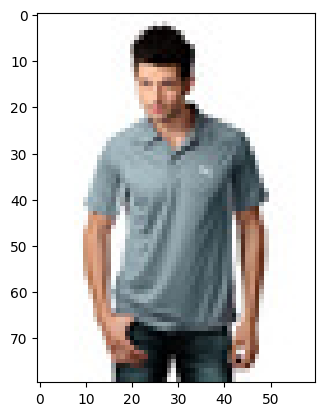

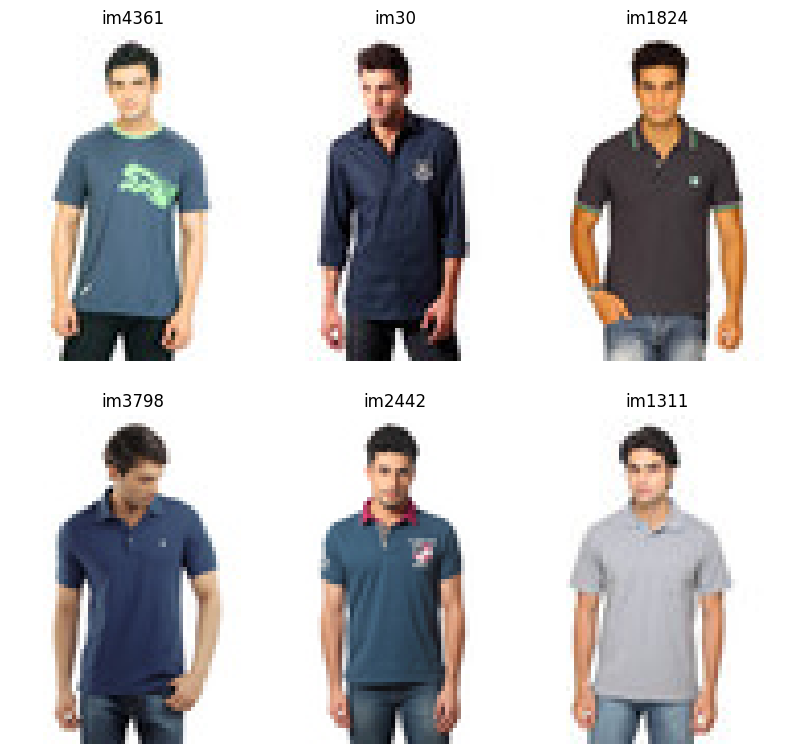

In [ ]:
# Idx Item to Recommender
idx_ref = 4

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

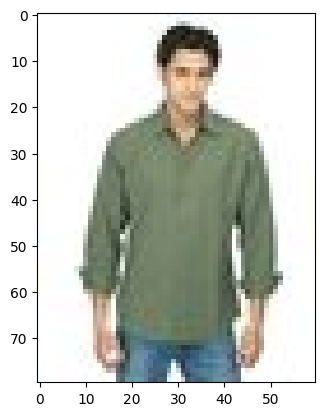

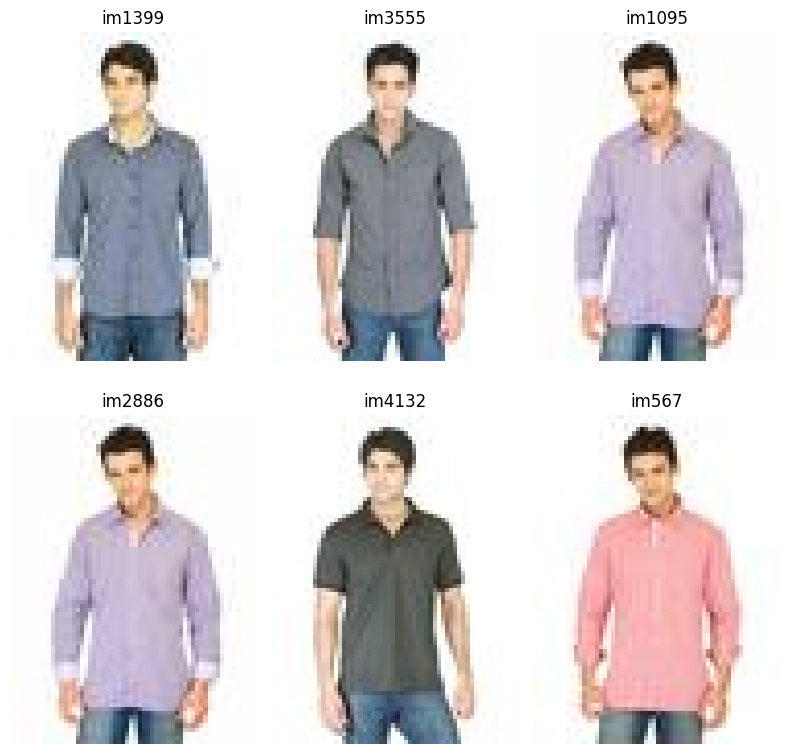

In [ ]:
# Idx Item to Recommender
idx_ref = 6

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

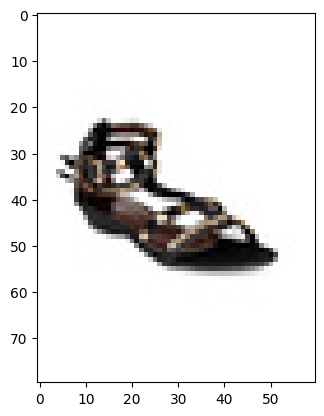

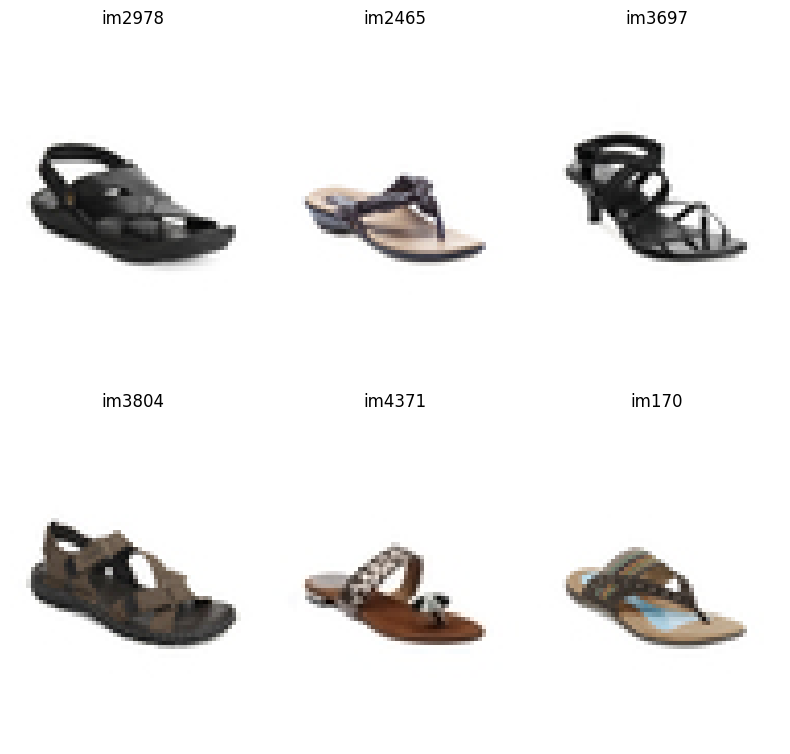

In [ ]:
# Idx Item to Recommender
idx_ref = 34

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)